2
instruction  observe object 1, delay, observe object 2, delay, observe object 3, delay, observe object 4, identity of object 1 equals identity of object 4? delay, observe object 5, identity of object 2 equals identity of object 5? delay, observe object 6, identity of object 3 equals identity of object 6?
answers:  ['null', 'null', 'null', 'null', 'null', 'null', 'true', 'null', 'true', 'null', 'false']


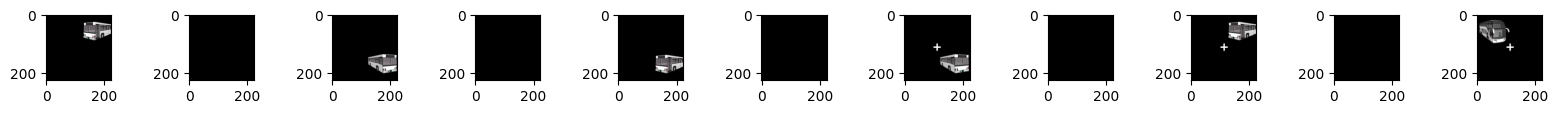

In [2]:
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg
import json
import sys
sys.path.append('/home/lucas/projects/iWISDM')

from iwisdm import make
import os
from copy import deepcopy
from numpy.random import choice 
from natsort import natsorted


stim_dir = '/mnt/tempdata/lucas/multi_task_data/stim/only_fmri_zoom' 

# Create environment
env = make(
    env_id='ShapeNet',
    dataset_fp=stim_dir,
)
# Initialize environment
print(env.env_spec.MAX_DELAY)

trial_dir = '/mnt/store_tiny/lucas/iwisdm_trials/control_trials/InterDMS_OBJ_ABCABC'

ti = '0'

images = []
for img_path in natsorted(glob.glob(trial_dir + f'/trial{ti}/frames/*.png')):
    images.append(mpimg.imread(img_path))


plt.figure(figsize=(20,11))
columns = 11
for i, image in enumerate(images):
    plt.subplot(len(images), columns, i + 1)
    plt.imshow(image)
with open(trial_dir + f'/trial{ti}/frames/task_info.json') as f:
    trial_info = json.load(f)
# print('merged tasks: ', trial_info['task_paths'])
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])